In [1]:
!pip install -q nltk scikit-learn wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("/kaggle/input/combined-dataset/combined_symptom_disease_dataset.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1988, 2)


,symptoms,disease
0,i have been experiencing a skin rash on my arm...,psoriasis
1,"my skin has been peeling, especially on my kne...",psoriasis
2,i have been experiencing joint pain in my fing...,psoriasis
3,"there is a silver like dusting on my skin, esp...",psoriasis
4,"my nails have small dents or pits in them, and...",psoriasis


After combining two public symptom–diagnosis datasets, the final dataset contains over 1,900 samples with free-text symptom descriptions and disease labels.  
This format directly matches the objective of predicting diseases from textual symptom descriptions using NLP.


In [3]:
# word count per sample
df["word_count"] = df["symptoms"].apply(lambda x: len(x.split()))

df["word_count"].describe()


count    1988.000000
mean       29.863682
std         7.086072
min         8.000000
25%        25.000000
50%        30.000000
75%        34.000000
max        55.000000
Name: word_count, dtype: float64

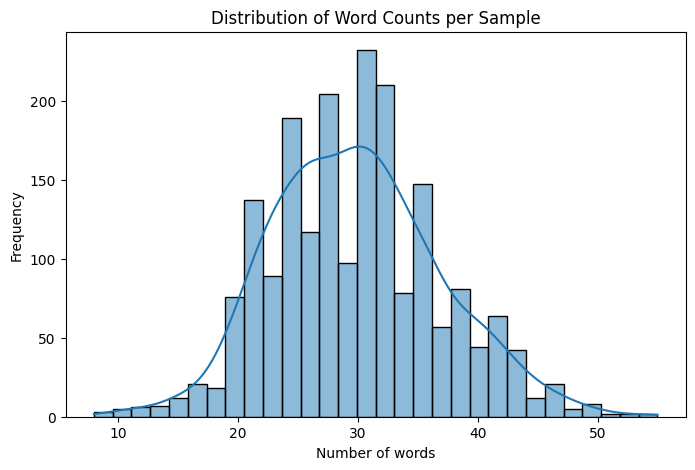

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Distribution of Word Counts per Sample")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


Most symptom descriptions contain between 20 and 35 words, indicating concise but informative texts.  
This consistency is well suited for NLP models such as TF-IDF and transformer-based approaches.


In [5]:
# Vocabulary analysis
stop_words = set(stopwords.words("english"))

# Tokenize all text
all_tokens = []
for text in df["symptoms"]:
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    all_tokens.extend(tokens)

vocab = set(all_tokens)

print("Total number of tokens:", len(all_tokens))
print("Vocabulary size:", len(vocab))


Total number of tokens: 28851
Vocabulary size: 1521


The dataset shows a moderate vocabulary size with repeated medically relevant terms.  
This balance suggests sufficient linguistic diversity without excessive noise.


In [6]:
# Most common words (Unigrams)
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)

top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
top_words_df


,word,count
0,also,916
1,lot,690
2,really,652
3,skin,561
4,pain,513
5,feeling,453
6,fever,431
7,feel,418
8,neck,283
9,high,270


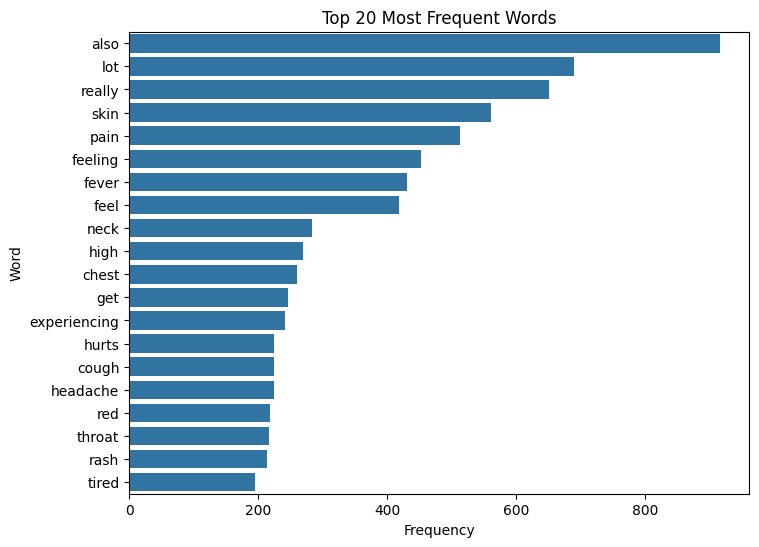

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_words_df, x="count", y="word")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


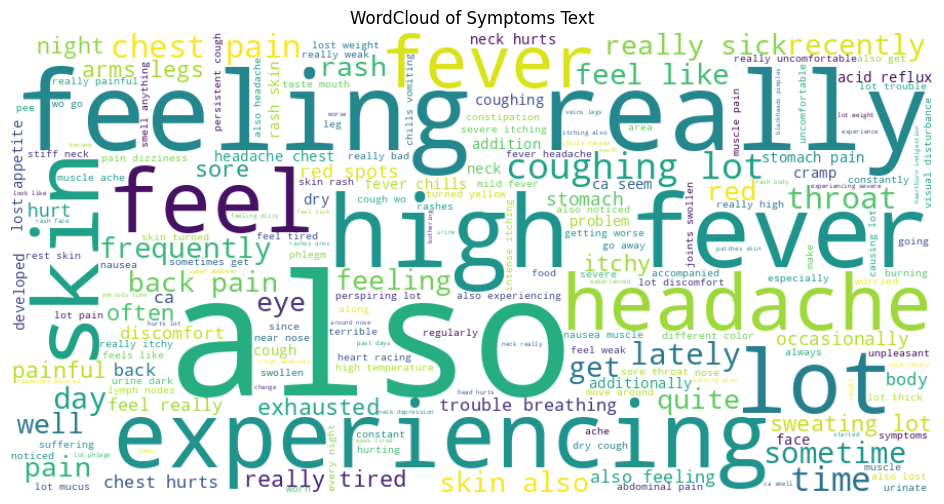

In [8]:
# WordCloud 
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color="white",
    stopwords=stop_words
).generate(" ".join(all_tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Symptoms Text")
plt.show()


In [9]:
# Unigrams Analysis
unigram_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 1),
    max_features=20
)

unigram_matrix = unigram_vectorizer.fit_transform(df["symptoms"])
unigram_freq = unigram_matrix.sum(axis=0).A1

unigram_df = pd.DataFrame({
    "ngram": unigram_vectorizer.get_feature_names_out(),
    "count": unigram_freq
}).sort_values(by="count", ascending=False)

unigram_df


,ngram,count
19,ve,1237
10,lot,690
14,really,652
16,skin,561
12,pain,513
6,having,477
4,feeling,453
5,fever,431
3,feel,418
11,neck,283


In [10]:
# Bigrams Analysis 
bigram_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2, 2),
    max_features=20
)

bigram_matrix = bigram_vectorizer.fit_transform(df["symptoms"])
bigram_freq = bigram_matrix.sum(axis=0).A1

bigram_df = pd.DataFrame({
    "ngram": bigram_vectorizer.get_feature_names_out(),
    "count": bigram_freq
}).sort_values(by="count", ascending=False)

bigram_df


,ngram,count
19,ve having,266
18,ve feeling,204
6,feeling really,192
10,high fever,178
3,coughing lot,111
16,ve coughing,108
9,having trouble,104
17,ve experiencing,97
2,chest pain,94
4,feel like,81


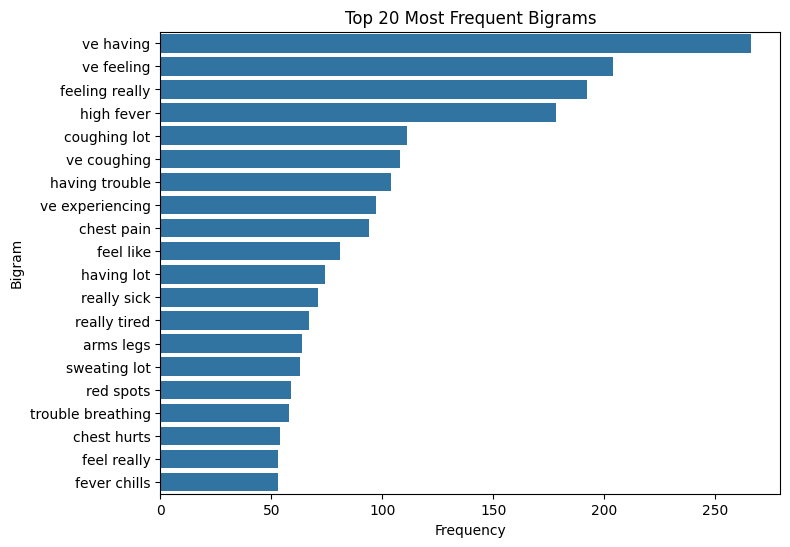

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=bigram_df, x="count", y="ngram")
plt.title("Top 20 Most Frequent Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


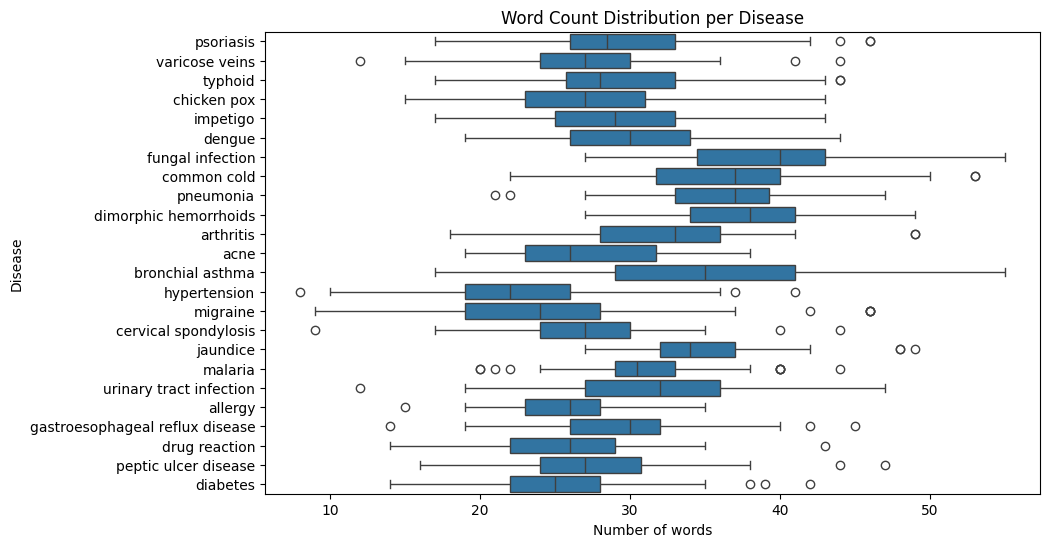

In [12]:
# Class-wise word count comparison

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="word_count",
    y="disease"
)
plt.title("Word Count Distribution per Disease")
plt.xlabel("Number of words")
plt.ylabel("Disease")
plt.show()

In [13]:
num_classes = df["disease"].nunique()
print("Number of classes:", num_classes)


Number of classes: 24
